---
title: "Example Notebooks of Poincare Map" \
author: "Naoya Ozaki" \
date: "04 January 2024" \
output: "poincare_map"

---

In [1]:
function f(du,u,p,t)
  du[1] = u[2]
  du[2] = -p
end

f (generic function with 1 method)

In [2]:
function condition(u, t, integrator) # Event when event_f(u,t) == 0
    u[1]
end

condition (generic function with 1 method)

In [3]:
function affect!(integrator)
    integrator.u[2] = -integrator.u[2]
end

affect! (generic function with 1 method)

In [41]:
using DifferentialEquations
cb = ContinuousCallback(condition, affect!, save_positions=(true, false))

ContinuousCallback{typeof(condition), typeof(affect!), typeof(affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT), Float64, Int64, Rational{Int64}, Nothing, Int64}(condition, affect!, affect!, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, nothing, SciMLBase.LeftRootFind, 10, Bool[1, 0], 1, 2.220446049250313e-15, 0, 1//100)

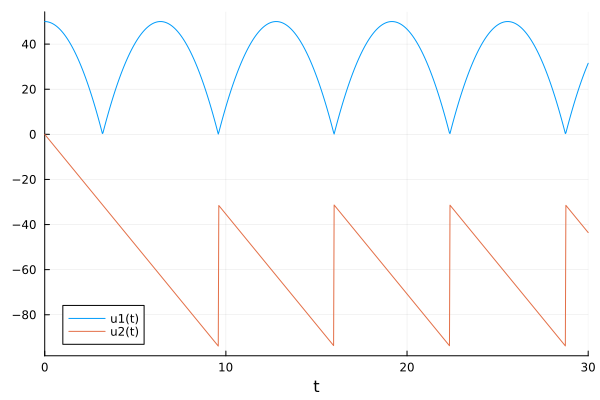

In [47]:
u0 = [50.0, 0.0]
tspan = (0.0, 30.0)
p = 9.8
prob = ODEProblem(f, u0, tspan, p)
sol_bounce = solve(prob, Tsit5(), callback=cb, saveat=100)
sol = solve(prob, Tsit5(), callback=cb)

using Plots
plot(sol)

In [49]:
sol_bounce

retcode: Success
Interpolation: 1st order linear
t: 7-element Vector{Float64}:
  0.0
  3.1943828249996846
  9.583148474999058
 15.971914124998406
 22.3606797749978
 28.74944542499725
 30.0
u: 7-element Vector{Vector{Float64}}:
 [50.0, 0.0]
 [7.76461924680934e-14, -31.30495168499692]
 [7.234780854630467e-13, -31.304951684996812]
 [8.309480073118199e-13, -31.30495168499679]
 [1.3421544844839017e-13, -31.304951684997132]
 [1.1277197773230544e-12, -31.304951684997103]
 [31.48550549911877, 19.04951684997017]